## Documenting current cloud masking method
27 Aug 2024

This method is what I have been using (granted most of my papers have been cloud free). But in general you can see it does fairly well with larger clouds. 

It does not appear to do well with thin clouds over snow. Although I do not think such a method for snow covered area exist at the time of making this.

In [214]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from spectral import *

def simple_cloud_threshold(rad_array, sensor_wavelengths, 
                    cloud_wl1 = 1994, 
                    cloud_wl2 = 2490, 
                    min_threshold=13): 
    
    '''
    TODO

    cloud-wl - nm

    min-threshold - prisma microW cm-2 nm-1 sr-1


    '''

    clouds = np.zeros_like(rad_array[:,:,1])

    # find closest to cloud_wl
    rad_cloud1 = rad_array[:,:,np.argmin(np.abs(sensor_wavelengths - cloud_wl1))]
    rad_cloud2 = rad_array[:,:,np.argmin(np.abs(sensor_wavelengths - cloud_wl2))]

    # Find max rad
    max_rad = np.amax(rad_array, axis=2)

    # assign cloud
    clouds[(max_rad>min_threshold) & (rad_cloud1 > 0.13)  & (rad_cloud2 > 0.12)] = 1

    # Assign Nan
    clouds[(rad_array[:,:,0] == -9999)] = -9999

    return clouds

In [215]:
def rgb_test_plot(img, scale_R, scale_G, scale_B):

    # Define RGB bands (adjust these indices based on your dataset)
    rgb_bands = (31, 20, 7)  # Replace with appropriate band indices

    # Extract RGB bands and scale for RGB/style
    r_band = img[:, :, rgb_bands[0]] / scale_R
    g_band = img[:, :, rgb_bands[1]] / scale_G
    b_band = img[:, :, rgb_bands[2]] / scale_B

    # Stack bands to create RGB image
    rgb_image = np.stack([r_band, g_band, b_band], axis=-1)

    return rgb_image

import matplotlib
c_white = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0)
c_red= matplotlib.colors.colorConverter.to_rgba('red',alpha = 1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_white,c_red],512)
            
            

Now testing on a few of the PRISMA images I've collected that I know have snow and clouds

## GRAND MESA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


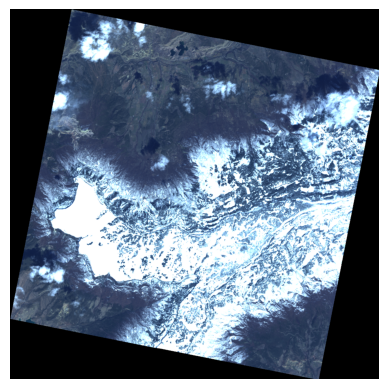

In [216]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20210406_GRANDMESA/albedo/PRS_20210406180740_20210406180744_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 20, 18,17))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


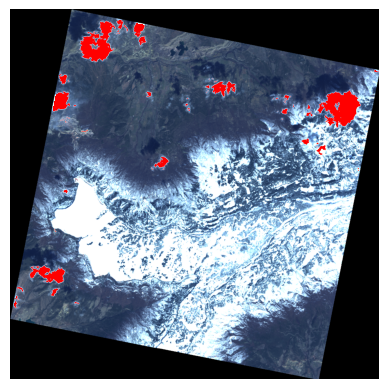

In [217]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20210406_GRANDMESA/albedo/PRS_20210406180740_20210406180744_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 20, 18,17))
plt.axis('off')
clouds = simple_cloud_threshold(img, sensor_wavelegnths)
clouds[clouds==-9999] = np.NaN
plt.imshow(clouds, cmap=cmap)
plt.show()

## Table Rock, CO

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


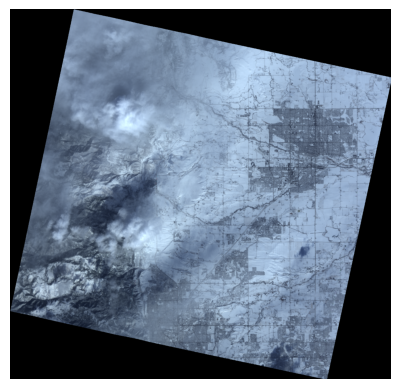

In [218]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230224_TABLEROCK/albedo/PRS_20230224175101_20230224175106_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 42, 42,42))
plt.axis('off')
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


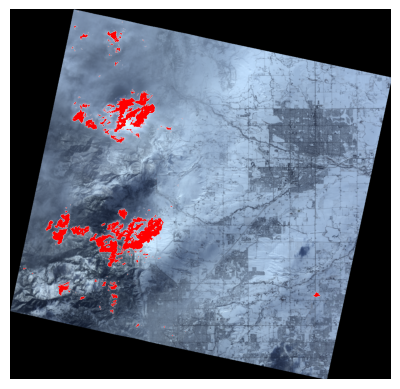

In [219]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230224_TABLEROCK/albedo/PRS_20230224175101_20230224175106_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 42, 42,42))
plt.axis('off')
clouds = simple_cloud_threshold(img, sensor_wavelegnths)
clouds[clouds==-9999] = np.NaN
plt.imshow(clouds, cmap=cmap)
plt.show()

## Mores Creek, ID

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


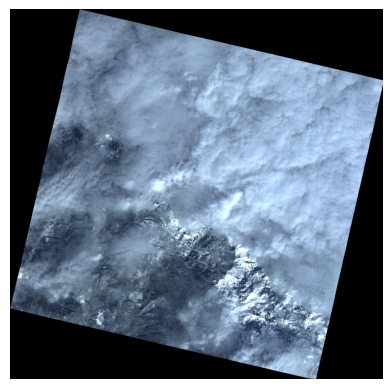

In [220]:

# Open a test image
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230311_MCS/albedo/PRS_20230311184642_20230311184647_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)

# Display the RGB image
plt.imshow(rgb_test_plot(img, 32, 32, 32))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


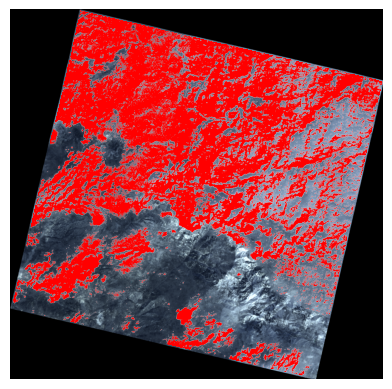

In [221]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230311_MCS/albedo/PRS_20230311184642_20230311184647_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 42, 42,42))
plt.axis('off')
clouds = simple_cloud_threshold(img, sensor_wavelegnths)
clouds[clouds==-9999] = np.NaN
plt.imshow(clouds, cmap=cmap)
plt.show()

## Caribou-Poker, AK

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


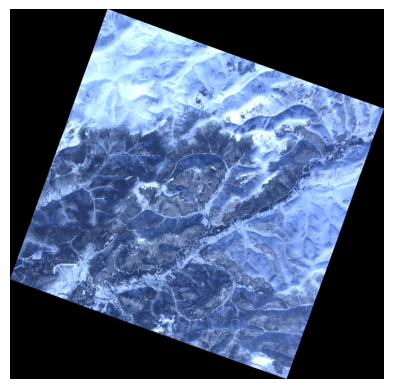

In [222]:
# Open a test image
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/CARI/20230315_CARI/rad/PRS_20230315212501_20230315212506_0001/PRS_20230315212501_20230315212506_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)

# Display the RGB image
plt.imshow(rgb_test_plot(img, 16, 15, 14))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


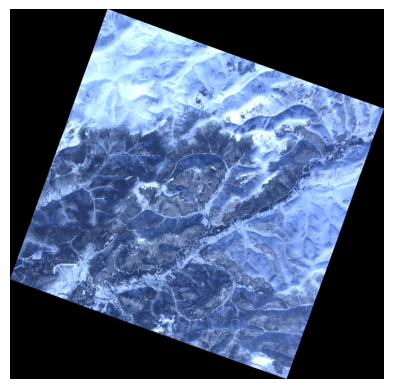

In [223]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/CARI/20230315_CARI/rad/PRS_20230315212501_20230315212506_0001/PRS_20230315212501_20230315212506_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 16,15,14))
plt.axis('off')
clouds = simple_cloud_threshold(img, sensor_wavelegnths)
clouds[clouds==-9999] = np.NaN
plt.imshow(clouds, cmap=cmap)
plt.show()

No clouds appear in this one.

## Another one from Mores Creek, ID

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


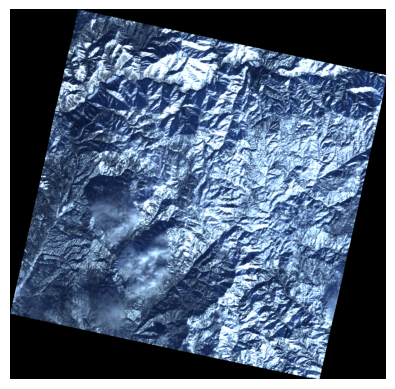

In [224]:
# Open a test image
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230129_MCS/albedo/PRS_20230129184006_20230129184011_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)

# Display the RGB image
plt.imshow(rgb_test_plot(img, 23, 21, 20))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


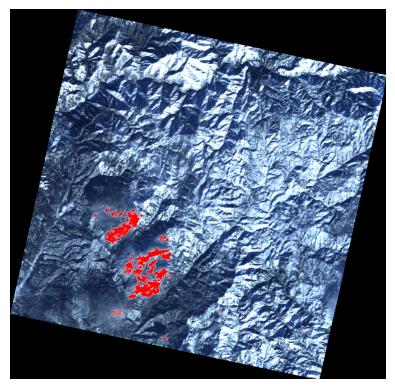

In [225]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230129_MCS/albedo/PRS_20230129184006_20230129184011_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 23, 21, 20))
plt.axis('off')
clouds = simple_cloud_threshold(img, sensor_wavelegnths)
clouds[clouds==-9999] = np.NaN
plt.imshow(clouds, cmap=cmap)
plt.show()

## No snow example in Idaho

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


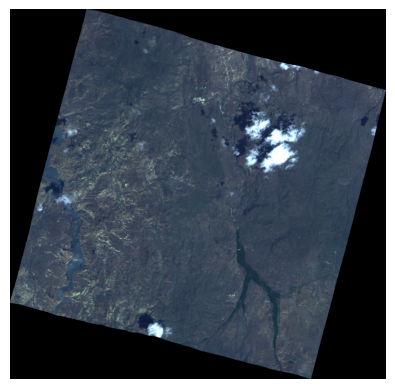

In [226]:
# Open a test image
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230618_FINEFUELS/rad/PRS_20230618185335_20230618185339_0001/PRS_20230618185335_20230618185339_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)

# Display the RGB image
plt.imshow(rgb_test_plot(img, 23, 21, 20))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


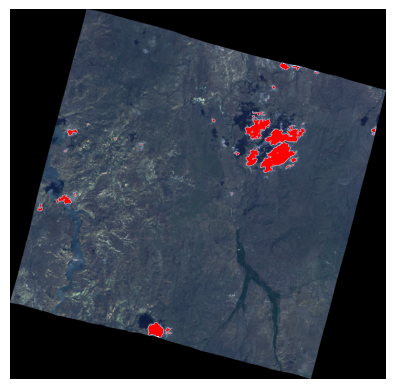

In [227]:
spectra = envi.open('/Users/brent/Documents/Albedo/PRISMA/20230618_FINEFUELS/rad/PRS_20230618185335_20230618185339_0001/PRS_20230618185335_20230618185339_0001_rdn_prj.hdr')
sensor_wavelegnths = np.array(spectra.bands.centers)
img = spectra.open_memmap(writeable=True)
plt.imshow(rgb_test_plot(img, 23, 21, 20))
plt.axis('off')
clouds = simple_cloud_threshold(img, sensor_wavelegnths)
clouds[clouds==-9999] = np.NaN
plt.imshow(clouds, cmap=cmap)
plt.show()